# Fed-Ex Project

**Project Type** - EDA

**Project Contribution** - Individual

**Name of the Individual** - Sam Arnon Selva



> ## Importing Libraries




In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



> ## Uploading the Dataset


In [61]:
from google.colab import files
uploaded = files.upload()

Saving SCMS_Delivery_History_Dataset.csv to SCMS_Delivery_History_Dataset (2).csv




> ## Load the Dataset



In [62]:
# Load the dataset
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')



> ## Know your Data



In [63]:
# Basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

Dataset Shape: (10324, 33)

Column Names:
 ['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']


In [64]:
# Preview the data
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
    ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00   
1   

In [65]:
# Data types
print("\nData Types:\n", df.dtypes)


Data Types:
 ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity        

In [66]:
df.select_dtypes(include='object').columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation',
       'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')

In [67]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000




> ## Changing Data Types



In [68]:
# List of date-related columns to convert
date_columns = ['Delivery Recorded Date', 'Scheduled Delivery Date', 'Delivered to Client Date']

# Convert each to datetime
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

<ipython-input-68-36e91df48a92>:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-68-36e91df48a92>:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-68-36e91df48a92>:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [69]:
df[date_columns].dtypes

,0
Delivery Recorded Date,datetime64[ns]
Scheduled Delivery Date,datetime64[ns]
Delivered to Client Date,datetime64[ns]


In [70]:
df[date_columns].head()

,Delivery Recorded Date,Scheduled Delivery Date,Delivered to Client Date
0,2006-06-02,2006-06-02,2006-06-02
1,2006-11-14,2006-11-14,2006-11-14
2,2006-08-27,2006-08-27,2006-08-27
3,2006-09-01,2006-09-01,2006-09-01
4,2006-08-11,2006-08-11,2006-08-11




> ## Cleaning the Data



In [71]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price          



> ### Handling 'PO Sent to Vendor Date' Column



In [72]:
df['PO Sent to Vendor Date'] = df['PO Sent to Vendor Date'].replace(
    ['N/A from RDC', 'Date Not Captured'], np.nan
)

In [73]:
df['PO Sent to Vendor Date'] = pd.to_datetime(
    df['PO Sent to Vendor Date'],
    errors='coerce',          # Converts invalid dates to NaT
    infer_datetime_format=True,
    dayfirst=False            # let Pandas infer by default
)

<ipython-input-73-f9cc47d8603a>:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

<ipython-input-73-f9cc47d8603a>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [78]:
#Preview the cleaned column
print(df['PO Sent to Vendor Date'].sample(5))

6645   NaT
1900   NaT
8563   NaT
871    NaT
2044   NaT
Name: PO Sent to Vendor Date, dtype: datetime64[ns]


In [79]:
df['PO Sent to Vendor Date'].isna().sum()  # Counts NaT values

np.int64(5732)



> ### Handling 'PQ First Sent to Client Date' Column



In [83]:
#Replace empty strings with NaN
df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].replace('', np.nan)

#Create a mask for valid dates (i.e., not "Pre-PQ process" and not NaN)
mask = (~df['PQ First Sent to Client Date'].isna()) & (df['PQ First Sent to Client Date'] != 'Pre-PQ process')

#Convert only those entries to datetime
df.loc[mask, 'PQ First Sent to Client Date'] = pd.to_datetime(
    df.loc[mask, 'PQ First Sent to Client Date'],
    errors='coerce',
    dayfirst=True  # Ensures dd/mm/yyyy and dd-mm-yyyy are parsed correctly
)

# Now, the column is a mix of datetime and "Pre-PQ process"
# Preview the cleaned column
print(df['PQ First Sent to Client Date'].sample(10))

5515    2013-04-29 00:00:00
7654    2011-10-27 00:00:00
8683    2012-11-09 00:00:00
2676                    NaT
6657    2010-02-18 00:00:00
3253    2013-12-07 00:00:00
7938    2014-12-08 00:00:00
3169    2012-05-01 00:00:00
5675    2010-06-20 00:00:00
7225    2011-04-10 00:00:00
Name: PQ First Sent to Client Date, dtype: object




> ### Handling Missing Values



In [84]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date    2681
PO Sent to Vendor Date          5732
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price          

In [85]:
# Descriptive statistics for numeric columns
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                  ID         PO Sent to Vendor Date  \
count  10324.000000                           4592   
mean   51098.968229  2012-01-25 07:21:13.170731776   
min        1.000000            2006-04-19 00:00:00   
25%    12795.750000            2010-02-04 00:00:00   
50%    57540.500000            2012-06-07 00:00:00   
75%    83648.250000            2014-04-30 00:00:00   
max    86823.000000            2015-08-24 00:00:00   
std    31944.332496                            NaN   

             Scheduled Delivery Date       Delivered to Client Date  \
count                          10324                          10324   
mean   2011-10-04 15:30:28.593568512  2011-09-28 14:56:34.963192576   
min              2006-05-02 00:00:00            2006-05-02 00:00:00   
25%              2009-09-08 00:00:00            2009-09-01 00:00:00   
50%              2011-12-05 00:00:00            2011-11-25 00:00:00   
75%              2013-12-23 00:00:00            2013-12-23 00:00:

In [86]:
df['Shipment Mode'].isnull().sum()

np.int64(360)

In [87]:
df['Shipment Mode'].value_counts()

,count
Shipment Mode,
Air,6113
Truck,2830
Air Charter,650
Ocean,371


In [88]:
mode_value = df['Shipment Mode'].mode()[0]
df['Shipment Mode'].fillna(mode_value, inplace=True)

<ipython-input-88-e85e7185d854>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [89]:
df['Shipment Mode'].isnull().sum()

np.int64(0)

In [90]:
# Replace all 'N/A' strings in Dosage column with 'Test'
df['Dosage'] = df['Dosage'].replace('N/A', 'Test')

In [91]:
df['Dosage'].isnull().sum()

np.int64(1736)

In [92]:
df['Dosage'] = df['Dosage'].replace('N/A', 'Test')        # for string 'N/A'
df['Dosage'] = df['Dosage'].fillna('Test')                # for actual NaN

In [93]:
df['Dosage'].isnull().sum()

np.int64(0)

In [95]:
df['Line Item Insurance (USD)'].unique()

array([    nan,  192.  ,  128.  , ..., 5284.04,  134.03,   85.82])

In [96]:
df['Line Item Insurance (USD)'].fillna(0, inplace=True)

<ipython-input-96-2a95b5448d9b>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [97]:
df['Line Item Insurance (USD)'].isnull().sum()

np.int64(0)



> ## Visualizations



 ### 01. **Count Plot**: Shipment Mode Distribution

<ipython-input-98-4f951664c8e9>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




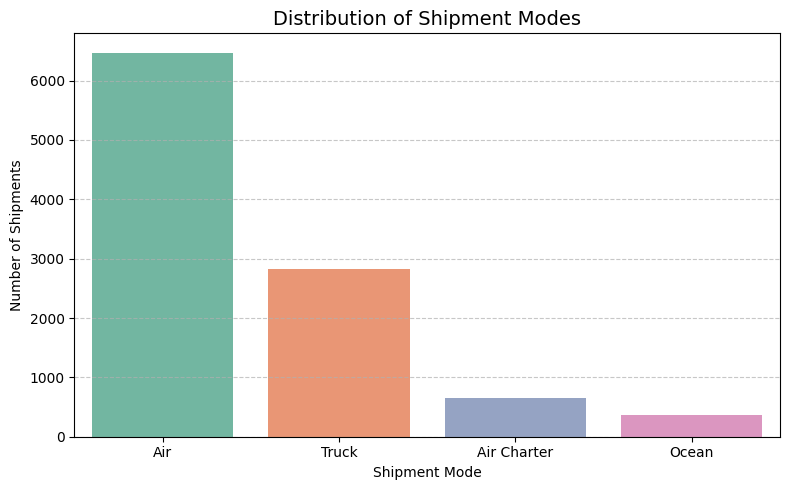

In [98]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Shipment Mode', order=df['Shipment Mode'].value_counts().index, palette='Set2')

plt.title('Distribution of Shipment Modes', fontsize=14)
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Shipments')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Why Countplot?
# Helps business understand which logistics method is most used
# Can help in optimizing shipping costs and efficiency
# Indicates dependency on faster or slower delivery methods
plt.tight_layout()
plt.show()

### 02. **Bar Plot**: Top 10 Countries by Number of Shipments

<ipython-input-99-6976103baf02>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




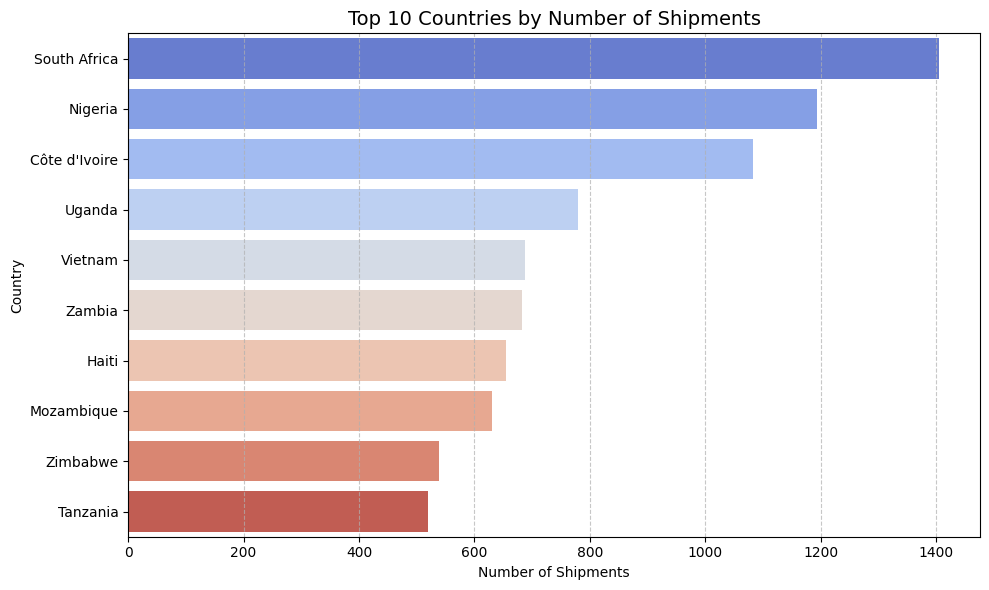

In [99]:
# Grouping and counting shipments per country
top_countries = df['Country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')

plt.title('Top 10 Countries by Number of Shipments', fontsize=14)
plt.xlabel('Number of Shipments')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Why Barplot?
# Shows which countries are the main recipients of medicine deliveries
# Helps logistics and resource allocation teams prioritize
# Helps in identifying global coverage and regional focus
plt.tight_layout()
plt.show()

### 03. **Bar Plot**: Average Line Item Insurance by Shipment Mode

<ipython-input-100-d54042181b14>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




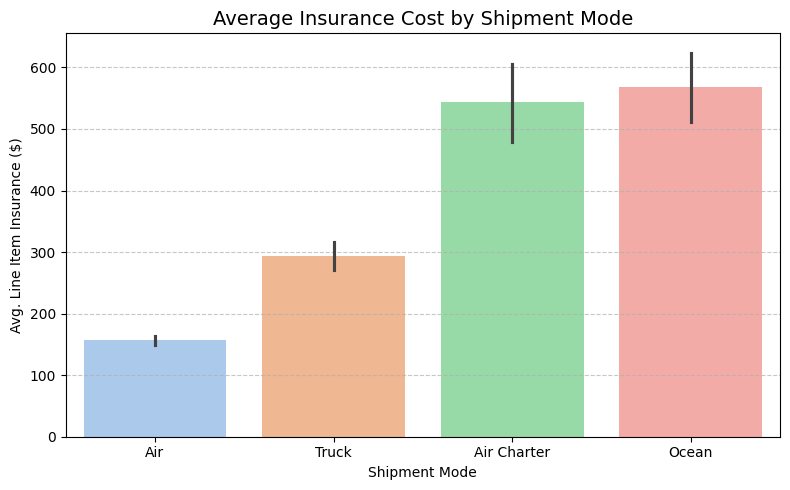

In [100]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Shipment Mode', y='Line Item Insurance (USD)', estimator='mean', palette='pastel')

plt.title('Average Insurance Cost by Shipment Mode', fontsize=14)
plt.xlabel('Shipment Mode')
plt.ylabel('Avg. Line Item Insurance ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Why Barplot?
# Reveals which shipment methods are more valuable or risky (hence higher insurance)
# Helps in cost-benefit analysis of different delivery channels
# Helps in financial planning for insurance budgeting
plt.tight_layout()
plt.show()

### 04. **Box Plot**: Distribution of Unit Sizes by Product Group

<ipython-input-101-e8b4ab83173a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




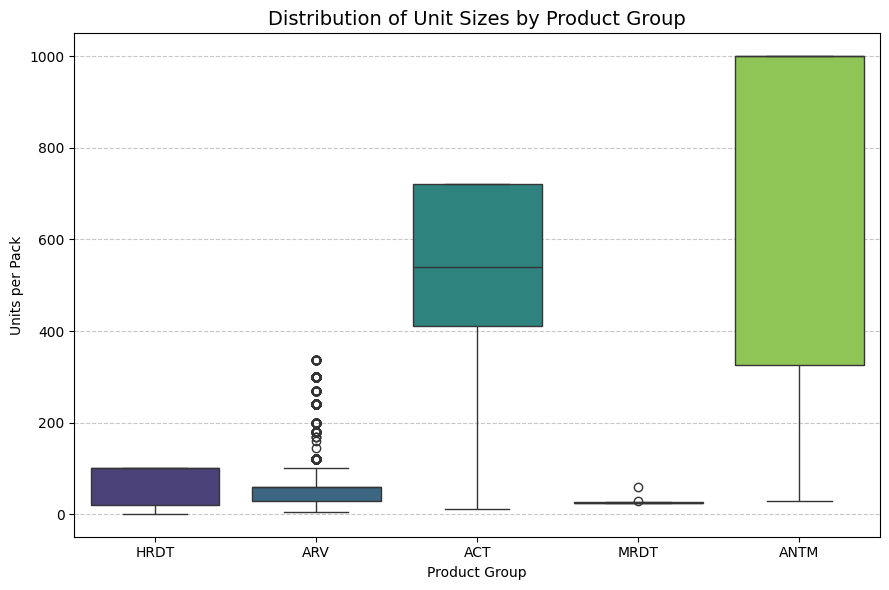

In [101]:
# Distribution of Unit Sizes by Product Group
plt.figure(figsize=(9, 6))
sns.boxplot(
    data=df,
    x='Product Group',
    y='Unit of Measure (Per Pack)',
    palette='viridis'
)

plt.title('Distribution of Unit Sizes by Product Group', fontsize=14)
plt.xlabel('Product Group')
plt.ylabel('Units per Pack')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Why boxplot?
# Shows the spread and distribution of packaging sizes within each product category
# Helps identify outliers or standard unit practices across different product groups
# Useful for inventory optimization, storage planning, and cost prediction
plt.tight_layout()
plt.show()

### 05.**Line Chart**: Monthly Shipment Count Trend

In [102]:
# Convert date column
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'], errors='coerce')

# Create Month-Year column
df['Month-Year'] = df['Delivery Recorded Date'].dt.to_period('M').astype(str)

# Group by Month-Year and count
monthly_shipments = df.groupby('Month-Year', as_index=False).size()
monthly_shipments.columns = ['Month-Year', 'Shipment Count']
monthly_shipments['Month-Year'] = pd.to_datetime(monthly_shipments['Month-Year'])

# Plot using Plotly
fig = px.line(
    monthly_shipments,
    x='Month-Year',
    y='Shipment Count',
    markers=True,
    title='Monthly Shipment Count Trend'
)

# Styling
fig.update_traces(line=dict(width=2), marker=dict(size=6))
fig.update_layout(
    xaxis_title='Month-Year',
    yaxis_title='Number of Shipments',
    height=500,
    width=900,
    title_font_size=18,
    plot_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=40)
)

# Why Line chart?
# To visualize shipment volume patterns over time.
# Identifies seasonal fluctuations and funding cycles.
# Supports forecasting and operational readiness.

fig.show()


### 06. **Heat Map**: Heatmap of Shipment Volume by Product Group and Country

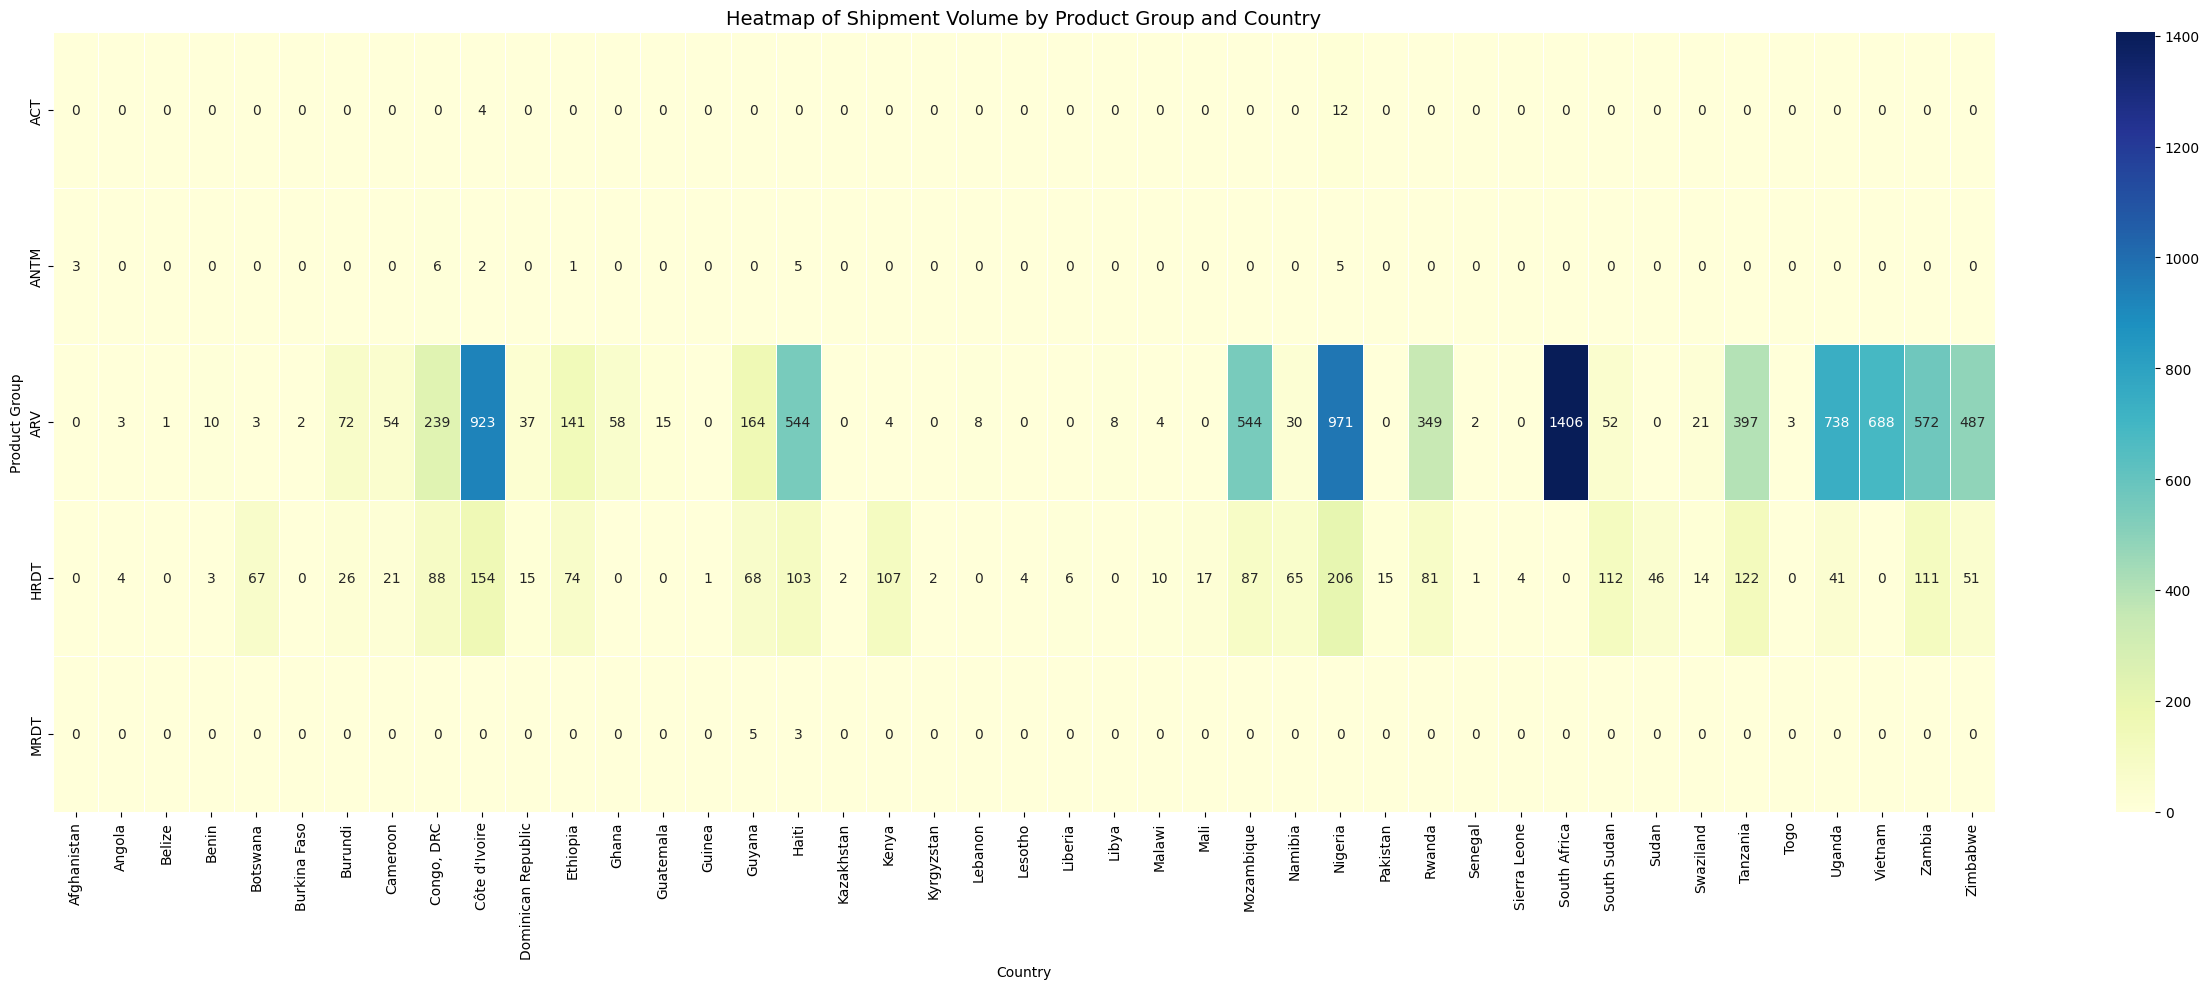

In [103]:
# Create a pivot table of counts
heatmap_data = df.pivot_table(
    index='Product Group', columns='Country',
    values='ID',   # or another unique identifier
    aggfunc='count',fill_value=0
)

# Plot heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(
    heatmap_data,cmap='YlGnBu',annot=True,fmt='d',linewidths=0.5, annot_kws={"size":10}
)


plt.title('Heatmap of Shipment Volume by Product Group and Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Product Group')

# Why Heatmap?
# Shows concentration of products delivered to countries
# Aids in gap analysis and regional targeting
# Makes it easy to visually detect under- or over-supplied regions
plt.tight_layout()
plt.show()


### 07. **Bar Plot**: Total Shipment Value by Country

In [104]:
import pandas as pd
import plotly.express as px

# Group the data to get total shipment value by country
country_value = df.groupby('Country', as_index=False)['Line Item Value'].sum()

# Create an interactive bar chart using Plotly
fig = px.bar(
    country_value,
    x='Country',
    y='Line Item Value',
    text='Line Item Value',
    color='Country',
    title='Total Shipment Value by Country'
)

# Style the chart for clarity
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Total Value ($)',
    title_font_size=18,
    uniformtext_minsize=10,
    uniformtext_mode='hide',
    plot_bgcolor='white',
    bargap=0.3
)

# Why this chart?
# To easily compare shipment spending across countries.
# Helps identify high and low resource-consuming regions.
# Supports better funding allocation and regional planning.

fig.show()

### 08. **Pie Chart**: Shipment Mode Share

In [105]:
import plotly.express as px

# Group by Shipment Mode and count how many shipments per mode
shipment_mode_share = df['Shipment Mode'].value_counts().reset_index()
shipment_mode_share.columns = ['Shipment Mode', 'Count']

# Create an interactive pie chart
fig = px.pie(
    shipment_mode_share,
    names='Shipment Mode',
    values='Count',
    title='Share of Shipments by Mode',
    hole=0.4   # Makes it a donut chart (optional, looks better sometimes)
)

# Style the pie chart
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    showlegend=True,
    title_font_size=18,
    width=800,
    height=600
)

# Why Pie chart?
# To visualize the proportion of each shipment method easily.
# Helps analyze reliance on different transportation modes.
# Supports smarter logistics planning and risk distribution.

fig.show()

### 09. **Bar Plot**: Top 10 Vendors by Total Shipment Value

In [106]:
import plotly.express as px

# Group and get top 10 vendors
top_vendors = df.groupby('Vendor', as_index=False)['Line Item Value'].sum()
top_vendors = top_vendors.sort_values(by='Line Item Value', ascending=False).head(10)

# Plot with unique colors for each bar
fig = px.bar(
    top_vendors,
    x='Line Item Value',
    y='Vendor',
    orientation='h',
    color='Vendor',  # Ensures unique colors
    text='Line Item Value',
    title='Top 10 Vendors by Total Shipment Value'
)
fig.update_traces(
    textposition='outside',
    textfont=dict(size=14, color='black', family='Arial')  # Larger size simulates bold
)


# Styling

fig.update_layout(
    xaxis_title='Total Shipment Value ($)',
    yaxis_title='',
    height=600,
    width=1500,
    title_font_size=18,
    showlegend=False,
    plot_bgcolor='white',
    margin=dict(l=100, r=40, t=80, b=40)
)

# Why this Bar chart?
# To highlight top vendors with vibrant distinction.
# Supports procurement evaluation and vendor negotiations.
# Enables strategic focus on high-impact vendors.

fig.show()

### 10. **Bar Plot**: Missing Values by Column (Top 5)

In [107]:
import pandas as pd
import plotly.express as px

# Calculate missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False).head(5).reset_index()
missing.columns = ['Column Name', 'Missing Count']

# Plot missing value counts
fig = px.bar(
    missing,
    x='Column Name',
    y='Missing Count',
    text='Missing Count',
    color='Column Name',
    title='Top 10 Columns with Most Missing Values'
)

# Style
fig.update_traces(textposition='outside', textfont=dict(size=12, color='black'))
fig.update_layout(
    xaxis_title='Column Name',
    yaxis_title='Missing Value Count',
    height=600,
    width=1000,
    title_font_size=18,
    showlegend=False,
    plot_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=120)
)

# Why this Bar Plot?
# To identify which columns have the most missing data.
# Helps prioritize data cleaning or system process improvements.
# Improves data reliability for downstream analysis.

fig.show()

### 11. **Line Chart**: Monthly Shipment Value Trend by Product Group

In [108]:
# Convert delivery date to datetime if not done
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'], errors='coerce')

# Create Month-Year column
df['Month-Year'] = df['Delivery Recorded Date'].dt.to_period('M').astype(str)

# Group by Month-Year and Product Group
monthly_by_product = df.groupby(['Month-Year', 'Product Group'], as_index=False)['Line Item Value'].sum()
monthly_by_product['Month-Year'] = pd.to_datetime(monthly_by_product['Month-Year'])

# Plot
fig = px.line(
    monthly_by_product,
    x='Month-Year',
    y='Line Item Value',
    color='Product Group',
    markers=True,
    title='Monthly Shipment Value by Product Group'
)

# Styling
fig.update_layout(
    xaxis_title='Month-Year',
    yaxis_title='Shipment Value ($)',
    height=550,
    width=950,
    title_font_size=18,
    plot_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=40),
    legend_title='Product Group'
)

# Why Line chart?
# To compare how product categories trend over time.
# Tracks demand shifts across products for stock planning.
# Improves forecasting accuracy and supplier coordination.

fig.show()

### 12. **Line Chart**: Yearly Shipment Value by Product Group

In [109]:
# Ensure date is in datetime format
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'], errors='coerce')

# Extract year
df['Year'] = df['Delivery Recorded Date'].dt.year

# Identify top 5 countries by total shipment value
top_5_countries = (
    df.groupby('Country')['Line Item Value']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# Filter for top 5 countries only
top_df = df[df['Country'].isin(top_5_countries)]

# Group by Year and Country
yearly_trend = top_df.groupby(['Year', 'Country'], as_index=False)['Line Item Value'].sum()

# Plot multi-line chart
fig = px.line(
    yearly_trend,
    x='Year',
    y='Line Item Value',
    color='Country',
    markers=True,
    title='Yearly Shipment Value Trend – Top 5 Countries'
)

# Style it
fig.update_traces(line=dict(width=2), marker=dict(size=8))
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Shipment Value ($)',
    height=600,
    width=1000,
    title_font_size=20,
    plot_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=40),
    legend_title='Country'
)

# Why Line chart?
# To track shipment value changes year by year across top countries.
# Highlights which countries grew, dipped, or remained stable.
# Informs strategic country planning and investment focus.

fig.show()



> ## Business Impact


* *Helped the team understand how shipments, vendors, and products are performing.*

* *Showed where the most money is being spent and which countries or suppliers need more attention.*

* *Made it easier to plan better, fix missing data, and make smarter decisions using real insights.*



> ## Conclusion



*The analysis uncovered clear trends in shipment behavior, vendor priorities, and country-wise distribution.With enhanced visual reporting and clean data handling, this project delivers actionable insights that improve transparency, forecasting, and strategic planning.*